# Pymaceuticals Inc.
---

### Analysis
The purpose of this analysis was to analyse the most recent animal study by Pymaceutical, Inc, a new pharmaceutical company focused on screening for potential tretments for squamous cell carcinoma. We analysed 249 mice  with data during 45 days, where tumor was observed and measured. We were focused on comparing the performance of Pymaceuticals' drug of interest, Capomulin, against the other treatment regimens.



Resources

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

Thank you Saad Khan for tutoring
 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_merged = pd.merge (study_results, mouse_metadata, on=['Mouse ID'], how = "left")

# Display the data table for preview
df_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [165]:
# Checking the number of mice.
df_merged['Mouse ID'].nunique()

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_merged.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_df = df_merged.loc[duplicate_mice==True]["Mouse ID"].unique()
duplicate_df


array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
cleaned_not_yet_df = df_merged.loc[df_merged["Mouse ID"]=='g989']
cleaned_not_yet_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = cleaned_df[cleaned_df["Mouse ID"].isin(duplicate_df)==False]
#cleaned_df = df_merged.loc[df_merged["Mouse ID"]!='g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [169]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

dff=cleaned_df[['Drug Regimen','Tumor Volume (mm3)']].copy()
dff['Tumor Volume (mm3) mean'] = dff['Tumor Volume (mm3)']
dff['Tumor Volume (mm3) median'] = dff['Tumor Volume (mm3)']
dff['Tumor Volume (mm3) var'] = dff['Tumor Volume (mm3)']
dff['Tumor Volume (mm3) sd'] = dff['Tumor Volume (mm3)']
dff['Tumor Volume (mm3) sem'] = dff['Tumor Volume (mm3)']
df_group =dff.groupby('Drug Regimen').agg({
   'Tumor Volume (mm3) mean':'mean' ,
    'Tumor Volume (mm3) median':'median',
    'Tumor Volume (mm3) var':'var' ,
    'Tumor Volume (mm3) sd':'std' ,
    'Tumor Volume (mm3) sem':'sem'  
})

df_group

,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) var,Tumor Volume (mm3) sd,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [172]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<Axes: xlabel='Drug Regimen'>

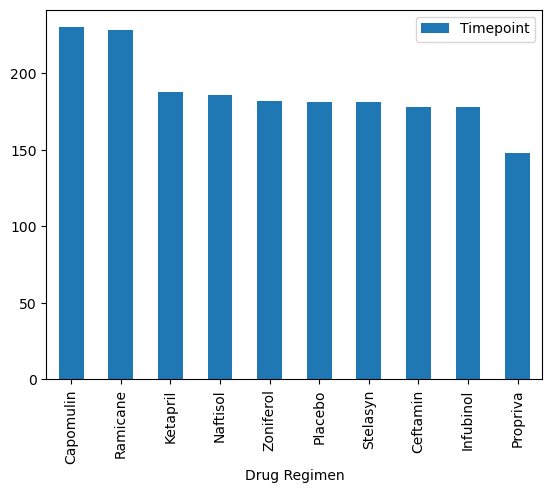

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dff=cleaned_df[['Drug Regimen','Timepoint']].groupby('Drug Regimen', as_index=True).count()
dff.sort_values(by='Timepoint', ascending=False, inplace=True) 

dff.plot(kind='bar')

## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse Sample ')

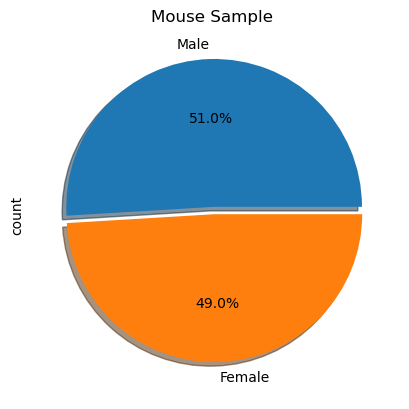

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05,0], shadow=True)
plt.title("Mouse Sample ")

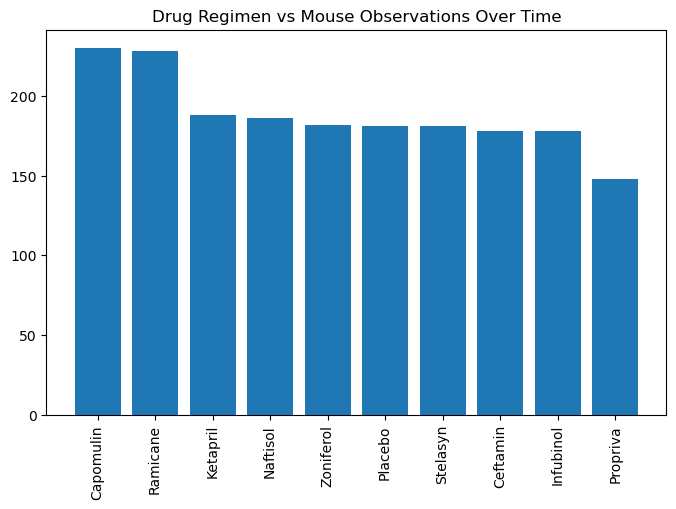

In [175]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,5))
plt.bar(dff.index.values, dff['Timepoint'])
plt.xticks(range(len(dff)), dff.index.values, rotation='vertical')
plt.title('Drug Regimen vs Mouse Observations Over Time')
plt.show()

Text(0.5, 1.0, 'Mouse Sample Population by Gender')

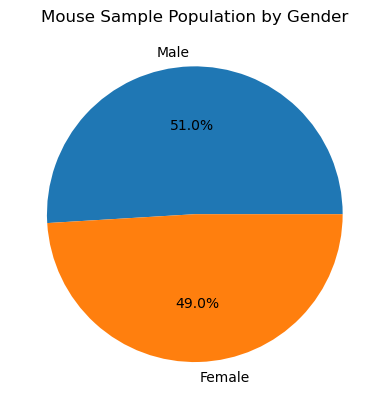

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(cleaned_df['Sex'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%')
plt.title("Mouse Sample Population by Gender")

## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=cleaned_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(max_timepoint_df,cleaned_df,how="left", on=["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors=merged_df.loc[merged_df["Drug Regimen"]==t]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumors)
    
    # Determine outliers using upper and lower bounds
    q1 = tumors.quantile(0.25)
    q3 = tumors.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumors.loc[(tumors < fence_low) | (tumors > fence_high)]
    print(f"{t}'s potential outliers: {df_out}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


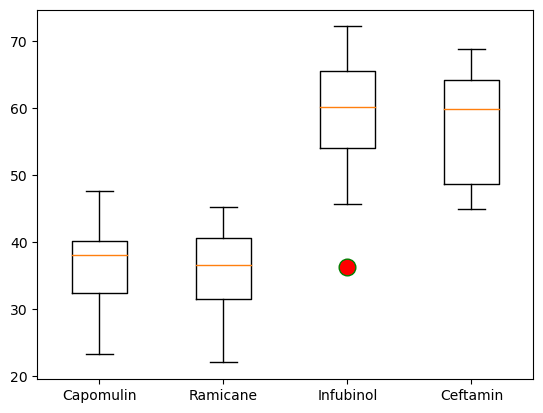

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

plt.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

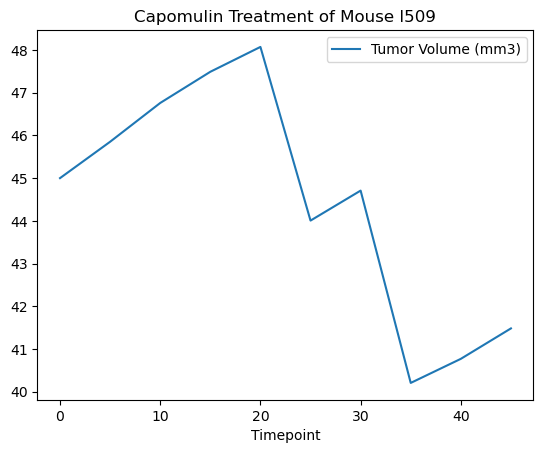

In [180]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df=cleaned_df.loc[cleaned_df["Mouse ID"]=="l509",["Tumor Volume (mm3)","Timepoint"]]
l509_df.plot(x="Timepoint", y="Tumor Volume (mm3)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

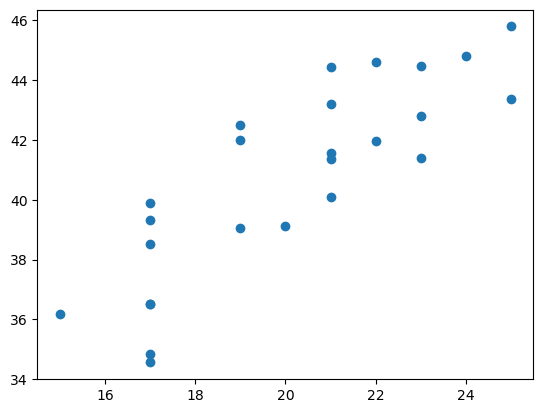

In [197]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
mean_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
cap_agg_df=capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()
plt.scatter(x=cap_agg_df["Weight (g)"],y=cap_agg_df["Tumor Volume (mm3)"])
#plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [7]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mean_weight, mean_tumor_volume)
print(f"The correlation between Mouse Weight and Tumor Volume is {round(correlation[0],2)}")
#capomulin_average_tumor = capomulin_df

#Add the Linear regresson equation and line to plot
capomulin_df=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
#capomulin_df=capomulin_df.groupby("Mouse ID").mean()

#correlation = st.pearsonr(mean_weight, mean_tumor_volume)
#print(f"The correlation between Mouse Weight and Tumor Volume is {round(correlation[0],2)}")
#capomulin_df = capomulin_average_tumor
#weight = capomulin_df["Weight (g)"]
#tumor_volume = capomulin_df["Tumor Volume (mm3)"]
#x_values = weight
#y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregres(mean_tumor_volume["Weight(g)"], mean_tumor_volume["Tumor Volume (mm3)"])
regress_values = mean_tumor_volume * slope + intercept
line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(mean_tumor_volume,mean_tumor_volume)
plt.plot(mean_tumor_volume,regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight for Capomulin")
plt.show()


NameError: name 'st' is not defined